In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
mypath = '/content/drive/MyDrive/ECG.csv'
ecg = pd.read_csv(mypath)

Mounted at /content/drive


##A

In [ ]:
labels_count = dict(ecg['label'].value_counts())
labels_count

{'N': 5992, 'O': 3151, 'A': 923, '~': 187}

##B

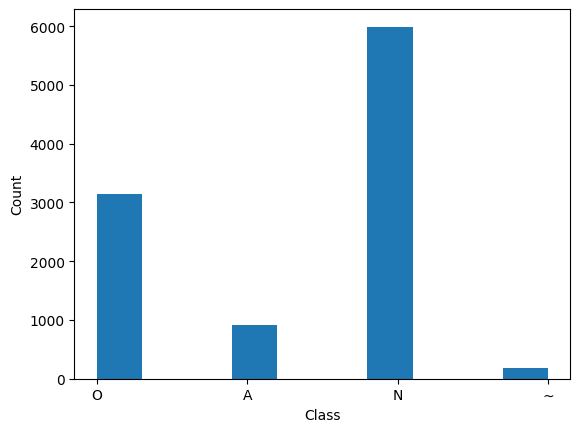

In [ ]:
import matplotlib.pyplot as plt
plt.hist(ecg['label'])
plt.ylabel('Count')
plt.xlabel('Class')
plt.show()

##C

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ecg[['feat'+str(i) for i in range(1,170)]], ecg['label'], train_size=0.9)

In [ ]:
import sklearn.neural_network as nn
mlp = nn.MLPClassifier(hidden_layer_sizes=[128,32,32,16], alpha=3e-5, learning_rate='adaptive', early_stopping=True, shuffle=True, random_state=True).fit(X_train, y_train)

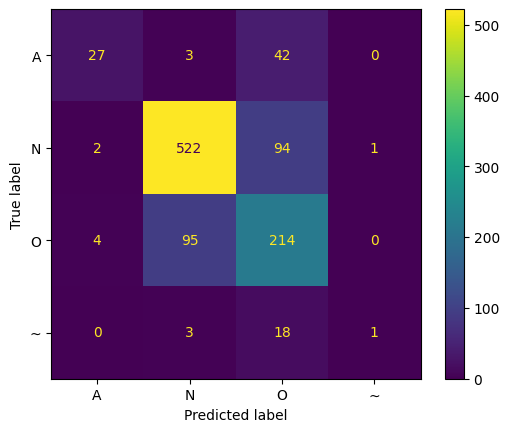

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
pred = mlp.predict(X_test)
cm = confusion_matrix(y_test, pred, labels=mlp.classes_)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp.classes_)
cmd.plot()

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_test, pred)
for line in report.split('\n'):
  print(line)

              precision    recall  f1-score   support

           A       0.82      0.38      0.51        72
           N       0.84      0.84      0.84       619
           O       0.58      0.68      0.63       313
           ~       0.50      0.05      0.08        22

    accuracy                           0.74      1026
   macro avg       0.68      0.49      0.52      1026
weighted avg       0.75      0.74      0.74      1026



##D

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
scaler = StandardScaler()
necg = scaler.fit(ecg[['feat'+str(i) for i in range(1,170)]]).transform(ecg[['feat'+str(i) for i in range(1,170)]])
label = ecg['label']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(necg, label, train_size=0.9)

In [ ]:
import sklearn.neural_network as nn
mlp = nn.MLPClassifier(hidden_layer_sizes=[128,32,32,16], alpha=3e-5, learning_rate='adaptive', early_stopping=True, shuffle=True, random_state=True).fit(X_train, y_train)

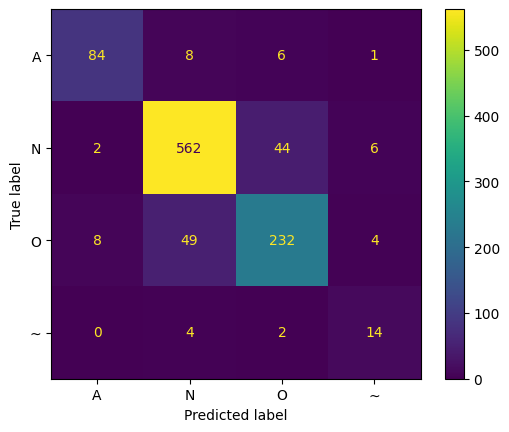

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
pred = mlp.predict(X_test)
cm = confusion_matrix(y_test, pred, labels=mlp.classes_)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp.classes_)
cmd.plot()

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_test, pred)
for line in report.split('\n'):
  print(line)

              precision    recall  f1-score   support

           A       0.89      0.85      0.87        99
           N       0.90      0.92      0.91       614
           O       0.82      0.79      0.80       293
           ~       0.56      0.70      0.62        20

    accuracy                           0.87      1026
   macro avg       0.79      0.81      0.80      1026
weighted avg       0.87      0.87      0.87      1026



##E

In [ ]:
aecg = ecg.drop(ecg[ecg['label']=='~'].index)
aecg['label'] = aecg['label'].replace('N', 'normal').replace('O', 'abnormal').replace('A', 'abnormal')

In [ ]:
labels_count = dict(aecg['label'].value_counts())
labels_count

{'normal': 5992, 'abnormal': 4074}

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
scaler = StandardScaler()
naecg = scaler.fit(aecg[['feat'+str(i) for i in range(1,170)]]).transform(aecg[['feat'+str(i) for i in range(1,170)]])
label = aecg['label']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(naecg, label, train_size=0.9)

In [ ]:
import sklearn.neural_network as nn
mlp = nn.MLPClassifier(hidden_layer_sizes=[128,32,32,16], alpha=3e-5, learning_rate='adaptive', early_stopping=True, shuffle=True, random_state=True).fit(X_train, y_train)

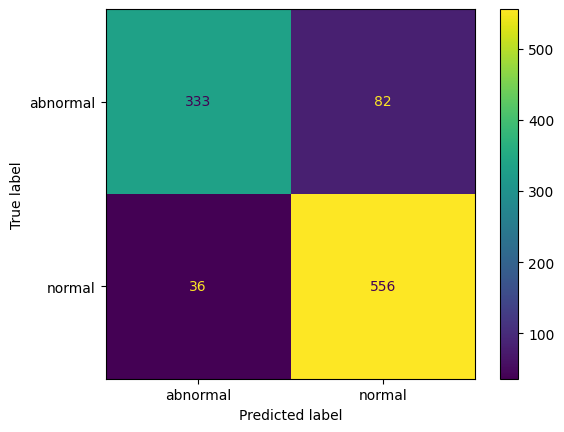

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
pred = mlp.predict(X_test)
cm = confusion_matrix(y_test, pred, labels=mlp.classes_)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp.classes_)
cmd.plot()

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_test, pred)
for line in report.split('\n'):
  print(line)

              precision    recall  f1-score   support

    abnormal       0.90      0.80      0.85       415
      normal       0.87      0.94      0.90       592

    accuracy                           0.88      1007
   macro avg       0.89      0.87      0.88      1007
weighted avg       0.88      0.88      0.88      1007

